# Basic fitting tests

The purpose of this notebook is to begin the basic fitting functions for a solar flare, to familiarize myself with the problem. The bulk of this code is cannabalized from Daniela Huppenkothen's code from the notebook in the same directory.

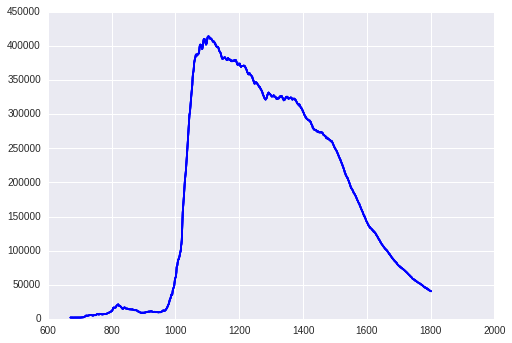

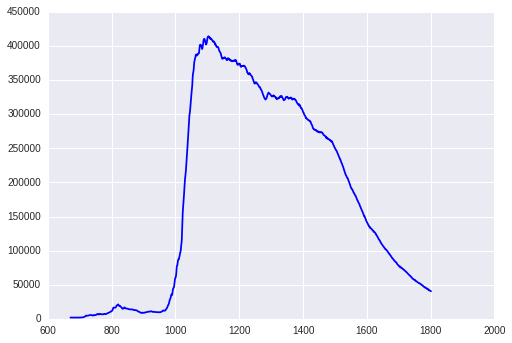

In [47]:
#importing packages

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from stingray import Lightcurve, Powerspectrum

#opening data
data1 = "/home/chris/Documents/QPP/SolarFlareGPs/data/121022782_ctime_lc.txt"
t1, I1 = np.loadtxt(data1, unpack=True)

#basic plot
fig1 = plt.figure()
plt.plot(t1, I1, 'b-')
plt.show()

Alright, we have our basic outline. Let's start with the most basic of options: a Gaussian.

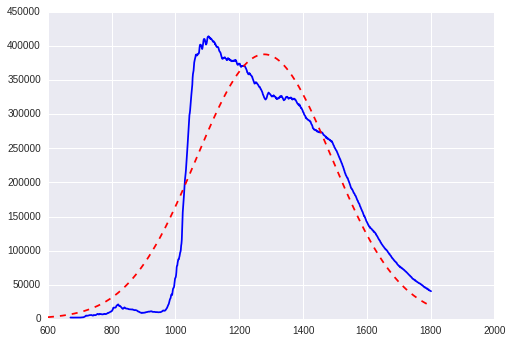

In [49]:
def gauss(x, a, b, c):
    return (a * np.exp(-1*np.power((x-b),2)/(2*(c**2))))

#doing a simple fit to the gaussian using a chi-squared fit built into scipy
t = np.linspace(600, 1800, 1000)
popt, pcov = sp.optimize.curve_fit(gauss, t1, I1, p0=[400000, 1200, 600])
Igauss = gauss(t, popt[0], popt[1], popt[2])
plt.plot(t1, I1, 'b-')
plt.plot(t, Igauss, '--r')
plt.show()

This didn't seem to work particularly well, so let's try a piecewise method:

1130


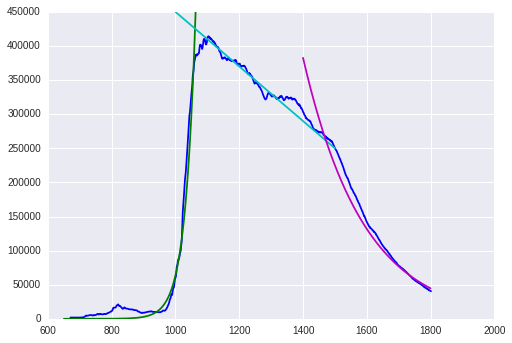

In [178]:
def expf(x, a, b, c):
    return a*x*np.exp((b*(x-c)))

def linef(x,a,b):
    return a*x + b


#rough "by eye" approximation of the function using a piecewise exp-linear-exp function
x1 = np.linspace(650, 1100, 500)
x2 = np.linspace(1000, 1500, 400)
x3 = np.linspace(1400, 1800, 300)
y1 = expf(x1, 12e-11, 3e-2, 100)
y2 = linef(x2, -400, 8.5e5)
y3 = expf(x3, 150, -6e-3, 1500)

plt.ylim(0,450000)
plt.plot(t1, I1, 'b-')
plt.plot(x1,y1,'g-')
plt.plot(x2,y2,'c-')
plt.plot(x3,y3,'m-')
plt.show()

So let's take our piecewise method and apply the fitting function to it:

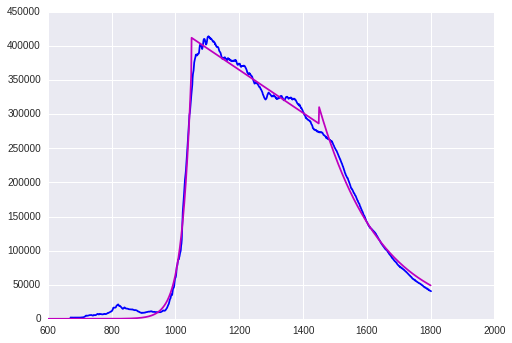

In [184]:
#super slow implementation of a piecewise function
def piecewise(x, a1, b1, c1, a2, b2, a3, b3, c3):
            result = np.empty(len(x))
            for i in range(len(x)):
                    if(x[i]<=1050):
                        result[i] = expf(x[i], a1, b1, c1)
                    elif (x[i]>1050 and x[i]<=1450):
                        result[i] = linef(x[i], a2, b2)
                    elif (x[i]>1450):
                        result[i] = expf(x[i], a3, b3, c3)
            return result
        
#parameters pulled from the "by eye" fit in prior cell
params = [12e-11, 3e-2, 100, -400, 8.5e5, 150, -6e-3, 1500]              

p, pcov = sp.optimize.curve_fit(piecewise, t1, I1, p0=params)
              
x = np.linspace(600, 1800, 1000)
y = piecewise(x, p[0], p[1], p[2], p[3], p[4], p[5], p[6], p[7])

plt.ylim(0,450000)
plt.plot(t1, I1, 'b-')
plt.plot(x,y,'m-')
plt.show()


A surprisingly good fit, all things considered.